In [25]:
import os
data_dir = os.listdir("image_dataset")
print(data_dir)

['mask', 'no_mask']


In [26]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions, VGG16, preprocess_input
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import tensorflow as tf

In [27]:
train_datasets = "image_dataset"
test_datasets = "image_dataset"

In [28]:
image_size = (150, 150)
number_class = len(data_dir)
batch_size = 10
number_epochs = 10
learning_rate = 0.002

In [29]:
train_dataset_generator = ImageDataGenerator(rescale = 1./255,
                                            rotation_range = 45,
                                            featurewise_center = True,
                                            featurewise_std_normalization = True,
                                            height_shift_range=0.2,
                                            width_shift_range=0.2,
                                            shear_range = 0.2,
                                            zoom_range = 0.2,
                                            channel_shift_range = 20,
                                            horizontal_flip = True,
                                            vertical_flip = True,
                                            validation_split = 0.2, 
                                            fill_mode="constant")

In [30]:
train_batches = train_dataset_generator.flow_from_directory(train_datasets,
                                                           target_size= image_size,
                                                           shuffle=True,
                                                           batch_size=batch_size,
                                                           subset='training',
                                                           seed=42,
                                                           class_mode = "binary")

Found 48 images belonging to 2 classes.


In [31]:
validation_batches = train_dataset_generator.flow_from_directory(train_datasets,
                                                           target_size= image_size,
                                                           shuffle=True,
                                                           batch_size=batch_size,
                                                           subset='validation',
                                                           seed=42,
                                                           class_mode = "binary")

Found 12 images belonging to 2 classes.


In [32]:
vgg_model = VGG16(weights="imagenet",
                 include_top = False,
                 input_shape=(150, 150, 3))

vgg_model.trainable = False

In [33]:
model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [34]:
model.compile(loss = 'binary_crossentropy',
             optimizer = Adam(learning_rate = learning_rate), 
             metrics = ['accuracy'])

In [35]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________
None


In [36]:
print(len(train_batches))
print()
print(len(validation_batches))

5

2


In [37]:
print(train_batches.n)
print()
print(validation_batches.n)

48

12


In [38]:
train_step_size = train_batches.n // train_batches.batch_size
validation_step_size = validation_batches.n //validation_batches.batch_size

In [39]:
model_runing_history = model.fit(train_batches, 
                                steps_per_epoch = train_step_size,
                                validation_data=validation_batches,
                                validation_steps=validation_step_size,
                                epochs = number_epochs)

C:\Users\karim Suzon\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\karim Suzon\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
4/4 [==============================] - 7s 2s/step - loss: 3.6308 - accuracy: 0.3947 - val_loss: 1.3436 - val_accuracy: 0.5000
Epoch 2/10
4/4 [==============================] - 6s 2s/step - loss: 1.1446 - accuracy: 0.4737 - val_loss: 0.4410 - val_accuracy: 0.8000
Epoch 3/10
4/4 [==============================] - 6s 2s/step - loss: 0.6306 - accuracy: 0.6053 - val_loss: 0.3862 - val_accuracy: 0.7000
Epoch 4/10
4/4 [==============================] - 6s 2s/step - loss: 0.3639 - accuracy: 0.8947 - val_loss: 0.4235 - val_accuracy: 0.8000
Epoch 5/10
4/4 [==============================] - 6s 2s/step - loss: 0.3515 - accuracy: 0.7895 - val_loss: 0.3437 - val_accuracy: 0.8000
Epoch 6/10
4/4 [==============================] - 6s 2s/step - loss: 0.4116 - accuracy: 0.7368 - val_loss: 0.5856 - val_accuracy: 0.8000
Epoch 7/10
4/4 [==============================] - 6s 2s/step - loss: 0.2438 - accuracy: 0.8947 - val_loss: 0.6732 - val_accuracy: 0.6000
Epoch 8/10
4/4 [=========================

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

def accuracy_loss_plot(model_data, epochs):
    
    
    acc = model_runing_history.history['accuracy']
    loss = model_runing_history.history['loss']
    val_acc = model_runing_history.history['val_accuracy']
    val_loss = model_runing_history.history['val_loss']
    
    plt.figure(figsize = (20, 8))
    plt.subplot(121)
    plt.plot(range(1, epochs), acc[1:], label = 'Training Accuracy')
    plt.plot(range(1, epochs), val_acc[1:], label = 'Test Accuracy')
    plt.title("Accuracy Over " + str(epochs) + "Epochs", size = 15)
    plt.legend()
    plt.grid(True)
    
    
    
    plt.figure(figsize = (20, 8))
    plt.subplot(122)
    plt.plot(range(1, epochs), loss[1:], label = 'Training Loss')
    plt.plot(range(1, epochs), val_loss[1:], label = 'Test Loss')
    plt.title("Loss Over " + str(epochs) + "Epochs", size = 15)
    plt.legend()
    plt.grid(True)
    
    plt.show()

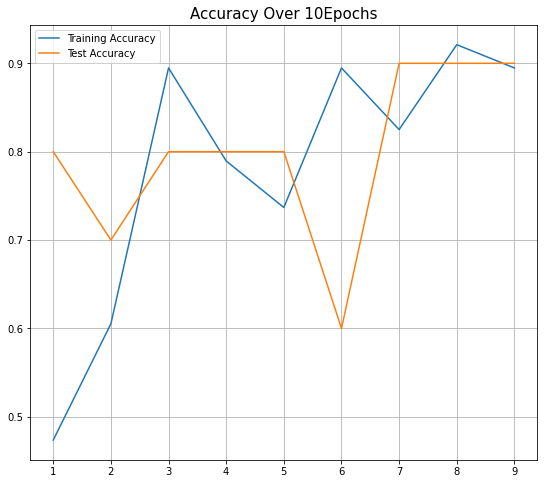

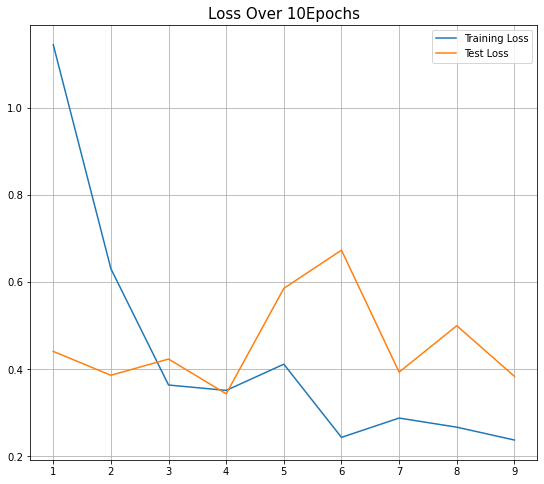

In [42]:
accuracy_loss_plot(model_runing_history, 10)

In [43]:
model.save("ClassificationModel.h5")

In [44]:
test_datagenrator = ImageDataGenerator(rescale=1./255)
test_batches = test_datagenrator.flow_from_directory(test_datasets,
                                       target_size= image_size,
                                       shuffle=False,
                                       batch_size=1,
                                       seed=42,
                                       class_mode = "binary")

test_batches.reset()

Found 60 images belonging to 2 classes.


In [45]:
test_batches.reset()
random_data = model.evaluate(test_batches,
                            steps = int(np.ceil(len(test_batches) / batch_size)), 
                             use_multiprocessing = False,
                            verbose = 1, # kind of representation
                             workers = 1)

6/6 [==============================] - 1s 140ms/step - loss: 0.6904 - accuracy: 0.8333


In [46]:
print("TestDatasets Loss: ", random_data[0])
print("TestDatasets Accuracy: ", random_data[1])

TestDatasets Loss:  0.6904047131538391
TestDatasets Accuracy:  0.8333333134651184


In [47]:
test_batches.reset()
predictted = model.predict(test_batches, 1000, verbose=1)

60/60 [==============================] - 9s 145ms/step


mask\0_0_0 copy 2 2.jpg


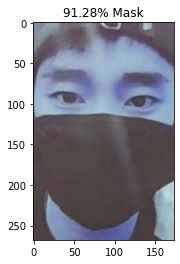

mask\0_0_0 copy 2.jpg


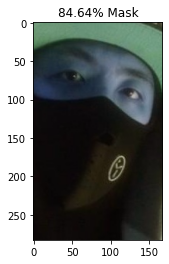

mask\0_0_0 copy 2.png


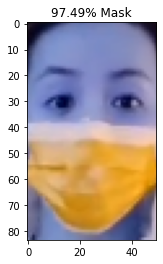

mask\0_0_0 copy 3 2.jpg


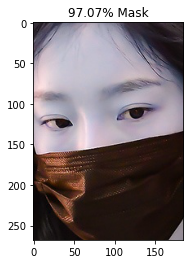

mask\0_0_0 copy 3.jpg


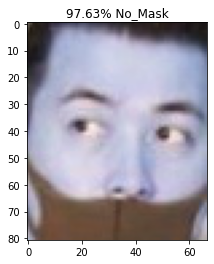

mask\0_0_0 copy 3.png


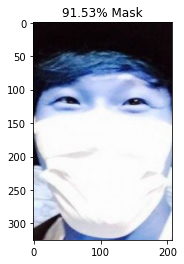

mask\0_0_0 copy 4 2.jpg


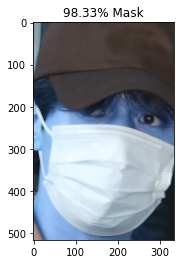

mask\0_0_0 copy 4.jpg


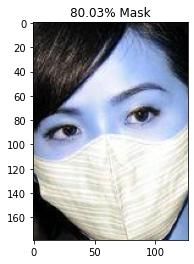

mask\0_0_0 copy 5 2.jpg


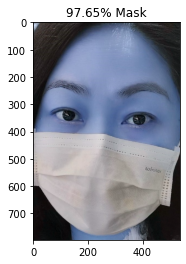

mask\0_0_0 copy 5.jpg


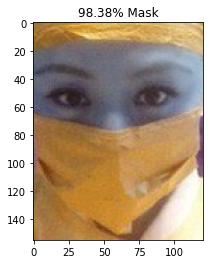

mask\0_0_0 copy 6.jpg


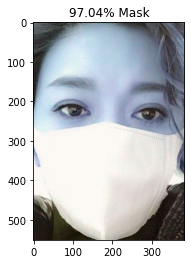

mask\0_0_0 copy 7.jpg


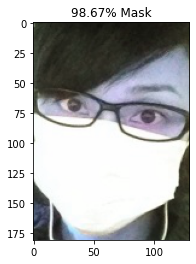

mask\0_0_≈˙◊¢ 2020-02-23 132115.png


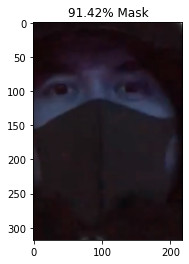

mask\0_0_≈˙◊¢ 2020-02-23 132400.png


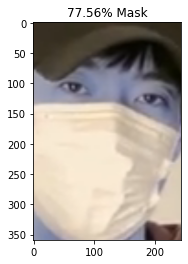

mask\0_0_≈˙◊¢ 2020-02-24 171804.png


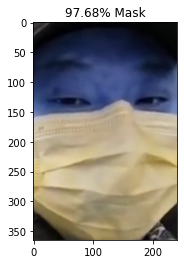

mask\0_0_≈˙◊¢ 2020-02-24 172039.png


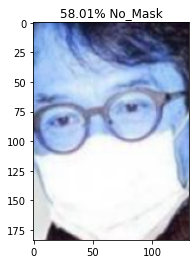

mask\0_0_≈˙◊¢ 2020-02-24 202509.png


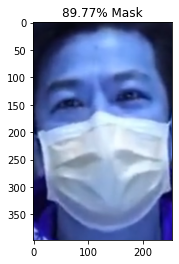

mask\0_0_≈˙◊¢ 2020-02-24 205216.png


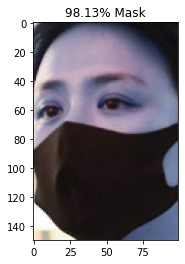

mask\0_0_≈˙◊¢ 2020-02-24 215234.png


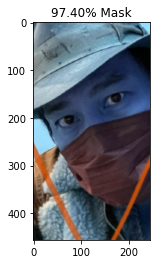

mask\0_0_≈˙◊¢ 2020-02-24 215615.png


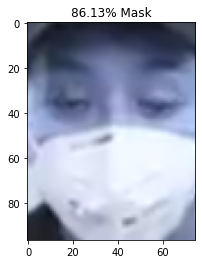

mask\0_0_≈˙◊¢ 2020-02-24 220536.png


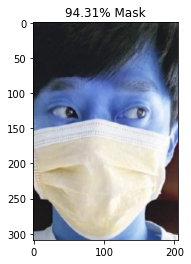

mask\0_0_≈˙◊¢ 2020-02-24 222124.png


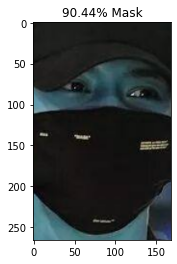

mask\0_0_≈˙◊¢ 2020-02-24 224833.png


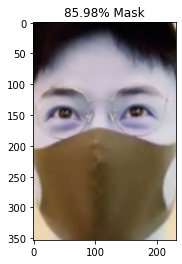

mask\0_0_≈˙◊¢ 2020-02-24 225329.png


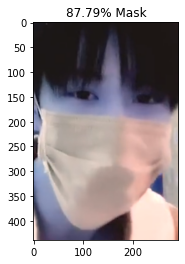

mask\0_0_≈˙◊¢ 2020-02-24 225427.png


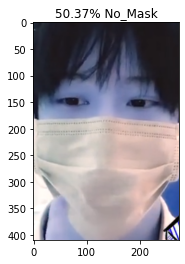

mask\0_0_≈˙◊¢ 2020-02-25 150422.png


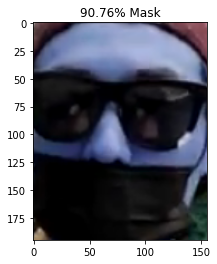

mask\0_0_≈˙◊¢ 2020-02-25 150847.png


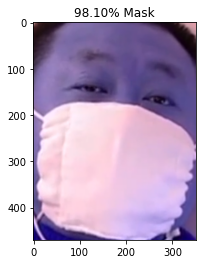

mask\0_0_≈˙◊¢ 2020-02-25 150921.png


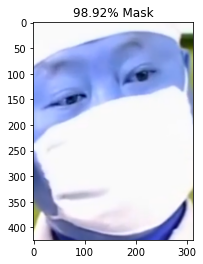

mask\0_0_≈˙◊¢ 2020-02-25 185823.png


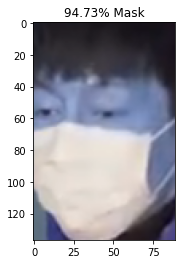

mask\0_0_≈˙◊¢ 2020-02-25 190026.png


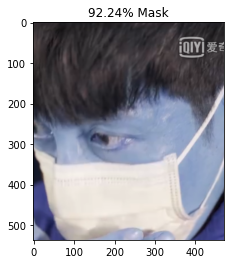

no_mask\0_0_aidai_0014.jpg


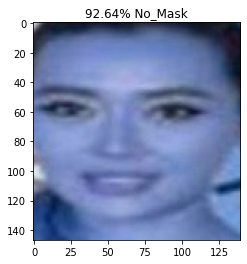

no_mask\0_0_aidai_0029.jpg


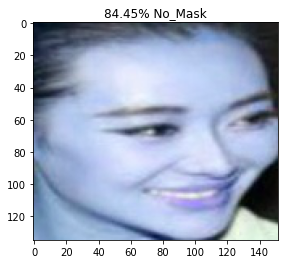

no_mask\0_0_aidai_0043.jpg


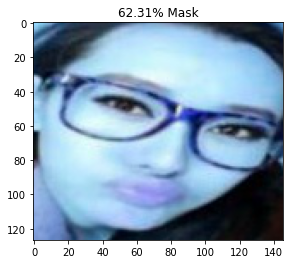

no_mask\0_0_aidai_0074.jpg


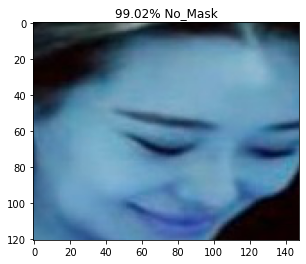

no_mask\0_0_aidai_0136.jpg


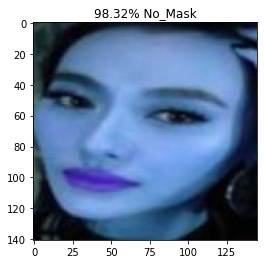

no_mask\0_0_anhu_0004.jpg


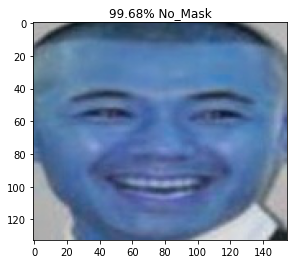

no_mask\0_0_anhu_0020.jpg


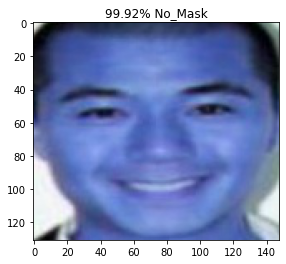

no_mask\0_0_anhu_0025.jpg


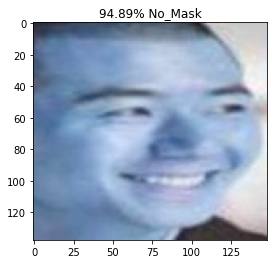

no_mask\0_0_anhu_0027.jpg


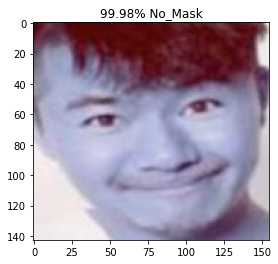

no_mask\0_0_anhu_0056.jpg


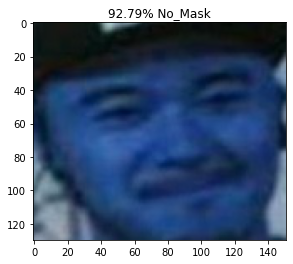

no_mask\0_0_anhu_0057.jpg


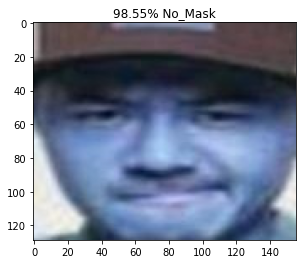

no_mask\0_0_anhu_0062.jpg


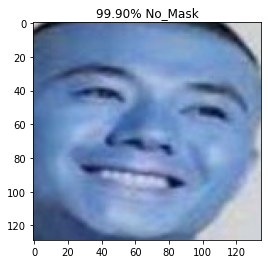

no_mask\0_0_anhu_0063.jpg


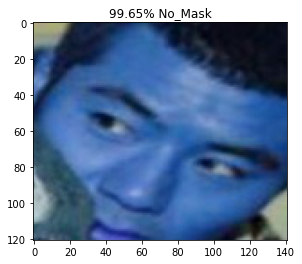

no_mask\0_0_anhu_0098.jpg


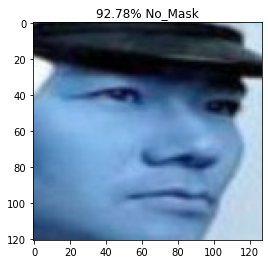

no_mask\0_0_anhu_0103.jpg


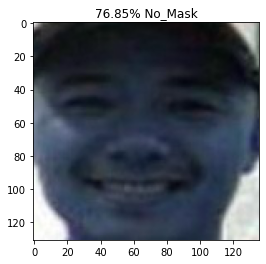

no_mask\0_0_anhu_0155.jpg


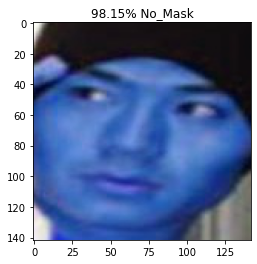

no_mask\0_0_anhu_0157.jpg


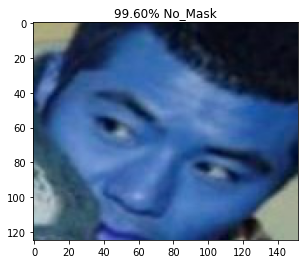

no_mask\0_0_anhu_0189.jpg


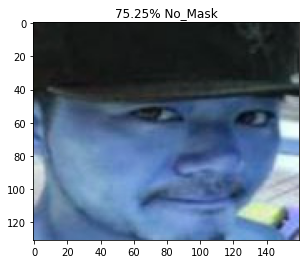

no_mask\0_0_anhu_0201.jpg


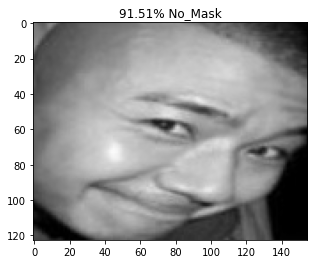

no_mask\0_0_anhu_0205.jpg


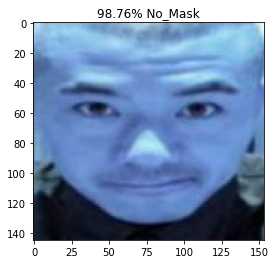

no_mask\0_0_anhu_0209.jpg


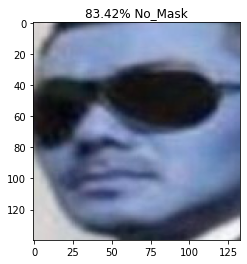

no_mask\0_0_anhu_0211.jpg


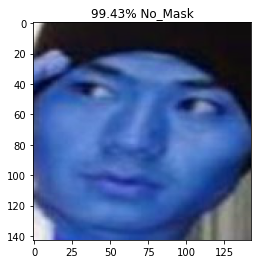

no_mask\0_0_anhu_0214.jpg


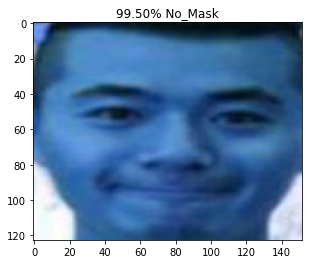

no_mask\0_0_anhu_0216.jpg


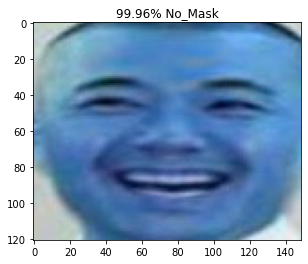

no_mask\0_0_baibaihe_0077.jpg


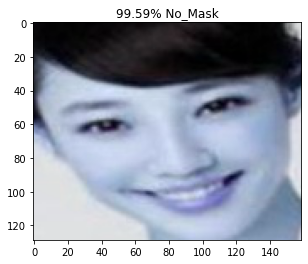

no_mask\0_0_baibaihe_0085.jpg


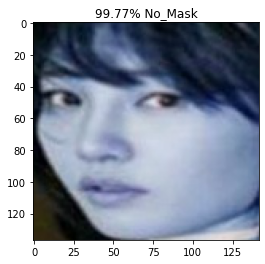

no_mask\0_0_baibaihe_0093.jpg


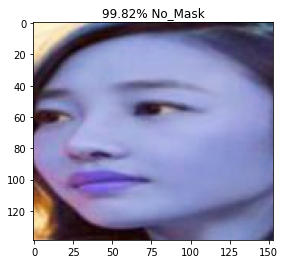

no_mask\0_0_baibaihe_0204.jpg


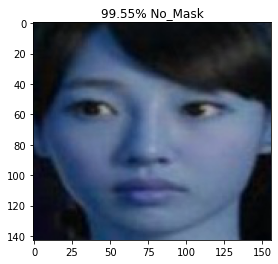

no_mask\0_0_baibaihe_0216.jpg


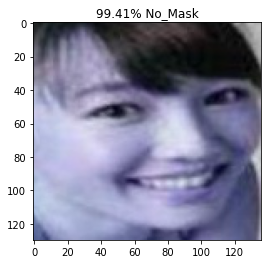

no_mask\0_0_baibaihe_0236.jpg


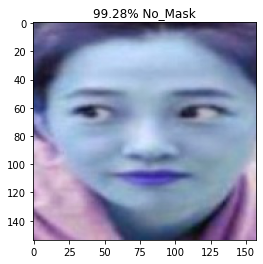

In [49]:
import cv2
import matplotlib.image as mat_image

for index, prob_value in enumerate(predictted):
    image_path = test_datasets + "/"+ test_batches.filenames[index]
    image = mat_image.imread(image_path)
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    pixel = np.array(image)
    plt.imshow(pixel)
    print(test_batches.filenames[index])
    
    if prob_value > 0.5:
        plt.title("%.2f" % (prob_value[0]*100) + "% No_Mask")
    else:
        plt.title("%.2f" % ((1 - prob_value[0])*100) + "% Mask")
        
    plt.show()